In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
client_data = pd.read_csv("client_data.csv")
print("Client data shape", client_data.shape)
client_data.head()

Client data shape (46347, 4)


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [3]:
deposit_data = pd.read_csv("deposit_data.csv")
print("Deposit data shape", deposit_data.shape)
deposit_data.head()

Deposit data shape (480394, 5)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [4]:
calendar_data = pd.read_csv("calendar_data.csv")
print("Calendar data shape", calendar_data.shape)
calendar_data.head()

Calendar data shape (153, 2)


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [5]:
# merge above 3 tables

# step 1 : Merge the client and the deposit data frames on the client ID column
df = client_data.merge(deposit_data, on="client_id")

# step 2: Merge the resulting data frame from step 1. with the calendar data set on the deposit / Gregorian date
df = df.merge(calendar_data, left_on="deposit_date", right_on="gregorian_date", copy=False)

df.drop(columns="gregorian_date", inplace=True)

print(df.shape)
display(df.head())

(480394, 9)


,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2


# Is launching Campaign at Month 6 will be more successful ?

In [87]:
all_3= df["client_id"].loc[df["month_name"]=="Month 3"] #  old customers  + new
all_3= set(all_3)
all_2 = df["client_id"].loc[df["month_name"]=="Month 2"] #  old customers 
all_2 = set(all_2)

In [88]:
new_customer3 = all_3 - all_2       

In [89]:
len(new_customer3)

11648

In [90]:
# remove the new_customer from df for month 3, 4 and 5

In [173]:
new_index=[]
for i in range(df.shape[0]):
    if df["month_name"][i]=="Month 1" or df["month_name"][i]=="Month 2":
        new_index.append(i)
    if (df["month_name"][i]=="Month 3" or df["month_name"][i]=="Month 4" or df["month_name"][i]=="Month 5") and df["client_id"][i] not in new_customer3:
        new_index.append(i)

In [174]:
len(new_index)

388445

In [175]:
df_without_newcust_3 = df.iloc[new_index]

In [176]:
df_without_newcust_3.shape

(388445, 9)

In [177]:
df_without_newcust_3.reset_index(drop=True, inplace = True) # df without new customer

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


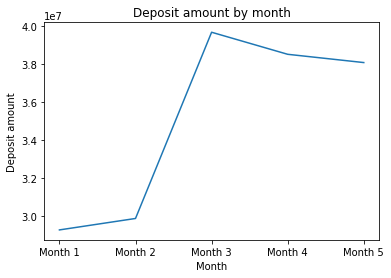

In [178]:
# Original

deposit_amount_by_month = df.groupby(by=df["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

In [242]:
39675057.10-29886431.27 # increment 10 million dollar increment

9788625.830000002

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    29903909.86
Month 4    27266650.25
Month 5    28083528.35
Name: deposit_amount, dtype: float64


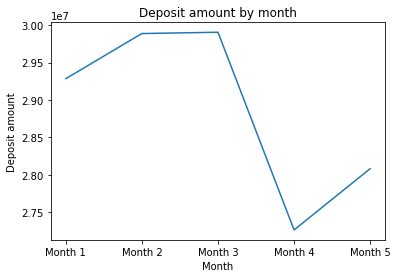

In [196]:
# Removed new customers from Month 3 , 4 and 5

deposit_amount_by_month = df_without_newcust_3.groupby(by=df_without_newcust_3["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

In [205]:
# use above data to predict the deposit for nonth 6.

all_total_deposit=[]
for x in deposit_amount_by_month:
    all_total_deposit.append(x)
    
sum(all_total_deposit)/len(all_total_deposit)  # avg budget_total , we initialize the months 6, 7 and 8 with this 

28885070.117999993

In [187]:
# df of new clients for month 3 , # total deposit done my new cust in month 3

new_client_index = []
for i in range(df.shape[0]):
    if df["client_id"][i] in new_customer3 and df["month_name"][i]=="Month 3":
        new_client_index.append(i)
df_only_new = df.iloc[new_client_index]

df_only_new["deposit_amount"].sum()

9771147.24

In [245]:
28885070.117999993 + 9771147.24     # how much deposit in month 6 if campaign runned in month 6.

38656217.357999995

In [244]:
38656217.357999995- 28083528.35 # around 10.5 million  # increment when camp in month 6

10572689.007999994

In [246]:
39646446.20453514 - 28083528.35 # arima prediction + new = 39646446

11562917.85453514

In [247]:
39675057.10 - 29886431.27 # 9.7 million increment

9788625.830000002

In [248]:
38656217.357999995 - 38081175.23

575042.1279999986

In [238]:
# predicting total deposit in month 6 using ARIMA


# ARMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = all_total_deposit
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[29875298.96453514]


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [239]:
 # add the total deposit in month3 by new customer with predicted total deposit in month 6
print("Total deposit in Month 6 : ",9771147.24 + 29875298.96453514)

Total deposit in Month 6 :  39646446.20453514


In [240]:
# Total deposit in Month 6 :  39646446.20453514, when we run campaign in month 6, which is less than what campaign produced in month3

print("difference in total deposit : ",39675057.10 - 39646446.20453514)

difference in total deposit :  28610.895464859903


The difference max can be around 28k, the month 3 for camaign was a good choice.

# Is campaign was successful ?

Success metrices: Increment in No of new Customers , Increment in total deposit

month_name
Month 1     77827
Month 2     80205
Month 3    108505
Month 4    107494
Month 5    106363
dtype: int64


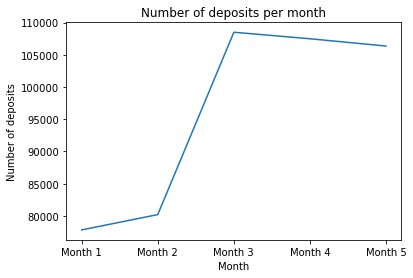

In [252]:
number_of_deposits_by_month = df.groupby(by=df["month_name"]).size()

print(number_of_deposits_by_month)

_ = plt.plot(number_of_deposits_by_month)

_ = plt.title("Number of deposits per month")
_ = plt.ylabel("Number of deposits")
_ = plt.xlabel("Month")

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


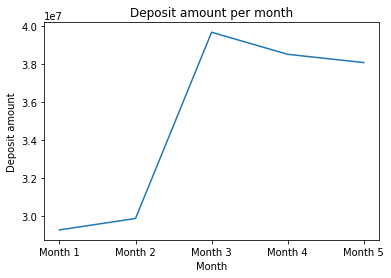

In [251]:
deposit_amount_by_month = df.groupby(by=df["month_name"])["deposit_amount"].sum()

print(deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount per month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

# Findings 

During the month the campaign was running, Freedom Debt Relief received almost $10 million dollars increase in deposit amounts than previous months.

In the months following the campaign, the total deposit amount starts to slowly decrease, but is still at the higher levels before the ad campaign: 8.5 million in the month immediately following the campaign, and 8 million in the last month of the data.

The cost of the campaign was 5 million, and the incurred deposit amount increased by a total of 26.5 million.

A quick Google search for "freedom debt relief pricing" reveals an 18 to 25 %, Assuming the lowest, 18% fee for all the clients,
around 4.5 million company spent in total for customer service.
Hence , total expenditure is 5 million + 4.5 million = Around 9.5 million.

Total earned = 26.5 million 
Total expenditure = 9.5 million

Total Profit = 26.5 million - 9.5 million = 17 million

# How we can improve campaign?


# Analysis 1 

Sub group (Category) with higest observable change from Month 2 to Month 3 in success metric ( increment in total deposit (measure by sum(total_deposit)))

In [15]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (11, 8)

In [16]:
df.columns

Index(['client_id', 'client_geographical_region', 'client_residence_status',
       'client_age', 'deposit_type', 'deposit_amount', 'deposit_cadence',
       'deposit_date', 'month_name'],
      dtype='object')

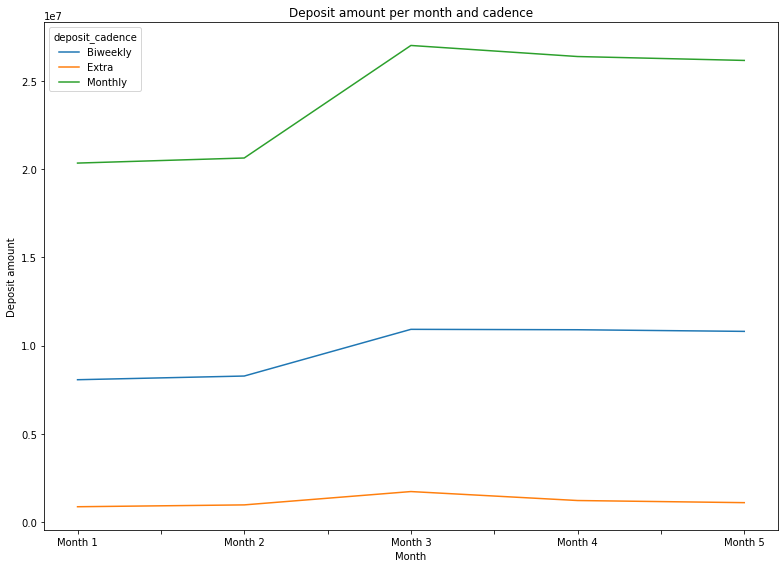

In [18]:
tmp_df = df.groupby(by=[df["deposit_cadence"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

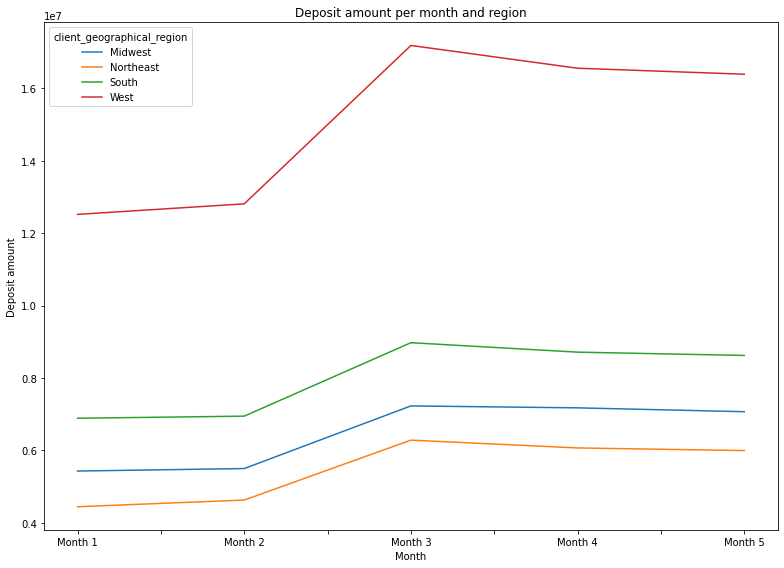

In [19]:
tmp_df = df.groupby(by=[df["client_geographical_region"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and region")
plt.tight_layout()

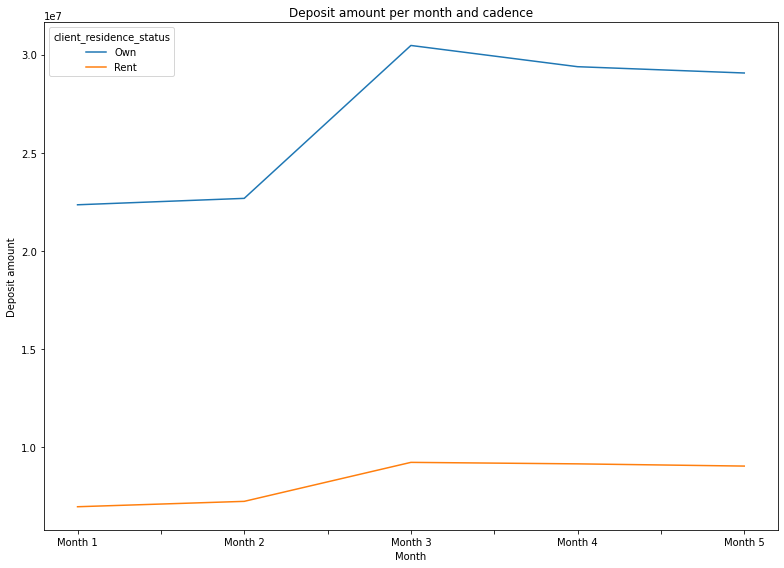

In [20]:
tmp_df = df.groupby(by=[df["client_residence_status"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

Almost all of the plots show similar patterns through time and it is difficult to make any suggestions.

One thing that could be explored more is targeted marketing. We notice that most of the people in the data are middle-aged (40-60 years) and most of them are home owners. We can observe this in the age histogram and the count per residence status in the EDA section.

In the next plot, we will show the deposit amount changing through time and age group (age divided by 10).

In [21]:
def discretize_age(row):
    return int(row.client_age / 10)

dff = df.copy(deep=True)
dff["age_group"] = dff.apply(discretize_age, axis=1)
dff.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2,2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2,2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2,8
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2,8


In [22]:
dff["age_group"].value_counts()

5     122747
4     113069
6      89293
3      81883
7      44745
2      16573
8      11027
9       1027
10        30
Name: age_group, dtype: int64

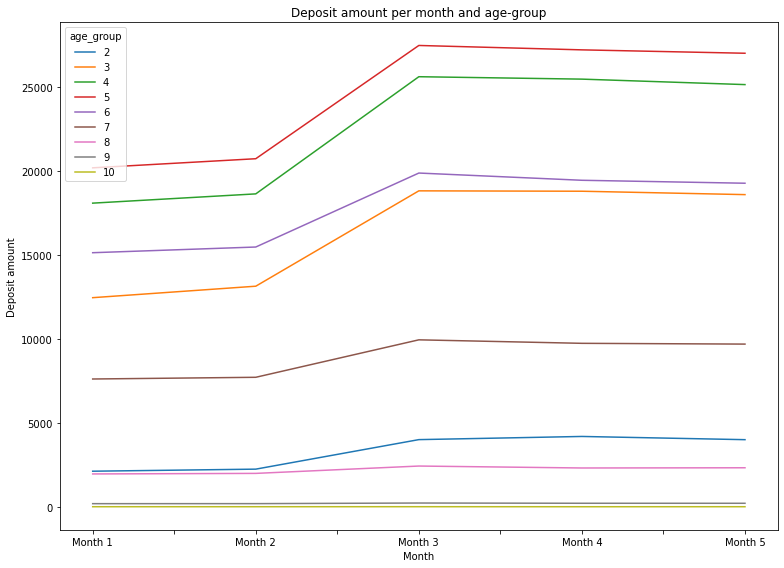

In [23]:
tmp_df = dff.groupby(by=[dff["age_group"], dff["month_name"]]).size()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and age-group")
plt.tight_layout()

We observe big increase in middle-aged customers and little to no increase in very young or very old customers. In the following analysis, we focus on the middle-aged sub-group of customers. We think that better engagement with them could result in more deposits.

In [43]:
# for all the graphs above, we have a winner, i.e a category, for that category (where clause), we can further dig deep.

# Analysis: 2 ( Find the sub group accounts to high profit with less Customers                            share)

In [41]:
#Note: denote metric: increment in total deposit -> this is our metric , use this to measure it -> sum(deposit_amount)

In [40]:
# find the sub group that corresponds to high deposit amount but have less number of observation under it.

In [33]:
df_q2 = df[(df["client_residence_status"] == "Own") 
         & (df["client_age"] <= 60) 
         & (df["client_age"] >= 40)]
df_q2.shape

(181068, 9)

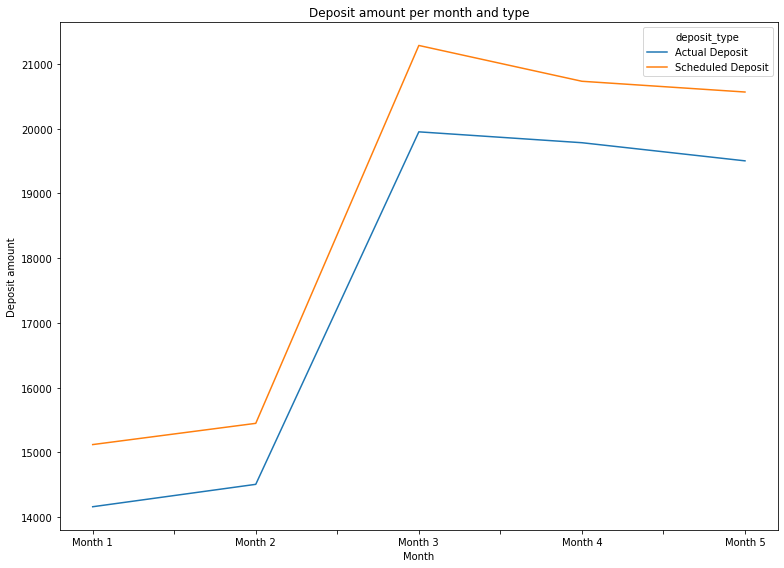

In [34]:
temp_df = df_q2.groupby(by=[df_q2["deposit_type"], df_q2["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

In [37]:
extra_deposit_df_q2 = df_q2[df_q2["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
extra_deposit_df = df[df["deposit_cadence"] == "Extra"]["deposit_amount"].sum()

(extra_deposit_df_q2 / extra_deposit_df)*100

42.34867523021417

In [39]:
(df_q2.shape[0] / df.shape[0]) * 100

37.69156150992727

This sub-group of customers is responsible for 42% of the extra deposit amount, and yet represents only 37% of clients.

We can further explore the extra deposits to identify client groups that are of interest.

In [28]:
df[df["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

West         3570
South        1991
Midwest      1486
Northeast    1300
Name: client_geographical_region, dtype: int64

In [29]:
df[df["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

Own     5856
Rent    2491
Name: client_residence_status, dtype: int64

In [30]:
df[df["deposit_cadence"] == "Extra"]["deposit_type"].value_counts()


Actual Deposit    8347
Name: deposit_type, dtype: int64

In [31]:
df[df["deposit_cadence"] == "Extra"]["month_name"].value_counts()

Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: month_name, dtype: int64

Most extra deposits are observed in the West region as expected. This distribution closely matches the distribution of other deposit types as well.

Clients who own their residence are approx. 2.33 times as likely to deposit extra amount than clients who rent their residence.

Most extra deposits are observed in Month 3, when the campaign was running. Post-campaign numbers for extra deposits are 33% higher than pre-campaign.